In [200]:
#Imports and API Key

import pandas as pd
import quandl
from scipy import stats
import scipy
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss
import matplotlib.pyplot as plt

quandl.ApiConfig.api_key = 'm8FYMyoCaJSbTrBASNHh'

In [175]:
data = pd.read_csv('data_for_pull.csv') #staging the QUANDL keys to pull in CSV

In [176]:
data['Quandl Key'].astype('str')

0         SGE/USABCONF
1           SGE/USAUNR
2          SGE/USAUNRY
3             FRED/GDP
4          SGE/USACNCN
5           SGE/USAEHS
6     FRED/LNS12032199
7     FRED/WPUSI019011
8          FRED/PERMIT
9           FRED/HOUST
10            FRED/TCU
11         SGE/USAPSAV
12        SGE/USAEXVOL
13        SGE/USAIMVOL
14          SGE/USABOT
15         FRED/T10Y3M
Name: Quandl Key, dtype: object

In [177]:
dataset = quandl.get([val for val in data['Quandl Key']]) #looping through the QUANDL keys to pull it into one DF

In [178]:
dataset

SGE/USABCONF - Value  SGE/USAUNR - Value  SGE/USAUNRY - Value  \
Date                                                                        
1947-01-01                   NaN                 NaN                  NaN   
1947-04-01                   NaN                 NaN                  NaN   
1947-07-01                   NaN                 NaN                  NaN   
1947-10-01                   NaN                 NaN                  NaN   
1948-01-01                   NaN                 NaN                  NaN   
1948-01-31                  51.7                 3.4                  NaN   
1948-02-29                  50.2                 3.8                  NaN   
1948-03-31                  43.3                 4.0                  NaN   
1948-04-01                   NaN                 NaN                  NaN   
1948-04-30                  45.4                 3.9                  NaN   
1948-05-31                  49.5                 3.5                  NaN   
1948-06-30                  53.0                 3.6                  NaN   
1948-07-01                   NaN                 NaN                  NaN   
1948-07-31                  48.4                 3.6                  NaN   
1948-08-31                  45.1                 3.9                  NaN   
1948-09-30                  42.1                 3.8                  NaN   
1948-10-01                   NaN                 NaN                  NaN   
1948-10-31                  47.2                 3.7                  NaN   
1948-11-30                  42.4                 3.8                  NaN   
1948-12-31                  35.0                 4.0                  NaN   
1949-01-01                   NaN                 NaN                  NaN   
1949-01-31                  32.9                 4.3                  NaN   
1949-02-28                  31.3                 4.7                  NaN   
1949-03-31                  34.5                 5.0                  NaN   
1949-04-01                   NaN                 NaN                  NaN   
1949-04-30                  35.5                 5.3                  NaN   
1949-05-31                  32.6                 6.1                  NaN   
1949-06-30                  31.6                 6.2                  NaN   
1949-07-01                   NaN                 NaN                  NaN   
1949-07-31                  39.0                 6.7                  NaN   
...                          ...                 ...                  ...   
2019-02-15                   NaN                 NaN                  NaN   
2019-02-19                   NaN                 NaN                  NaN   
2019-02-20                   NaN                 NaN                  NaN   
2019-02-21                   NaN                 NaN                  NaN   
2019-02-22                   NaN                 NaN                  NaN   
2019-02-25                   NaN                 NaN                  NaN   
2019-02-26                   NaN                 NaN                  NaN   
2019-02-27                   NaN                 NaN                  NaN   
2019-02-28                  54.2                 3.8                  8.9   
2019-03-01                   NaN                 NaN                  NaN   
2019-03-04                   NaN                 NaN                  NaN   
2019-03-05                   NaN                 NaN                  NaN   
2019-03-06                   NaN                 NaN                  NaN   
2019-03-07                   NaN                 NaN                  NaN   
2019-03-08                   NaN                 NaN                  NaN   
2019-03-11                   NaN                 NaN                  NaN   
2019-03-12                   NaN                 NaN                  NaN   
2019-03-13                   NaN                 NaN                  NaN   
2019-03-14                   NaN                 NaN                  NaN   
2019-03-

In [179]:
type(dataset.index)

pandas.core.indexes.datetimes.DatetimeIndex

In [180]:
dataset.index = dataset.index.strftime('%Y-%m') #converting the datetime index to Y/M so it is collapsable

In [181]:
dataset = dataset.groupby(dataset.index, as_index=True).agg(sum) #collapsing by Y/M

In [182]:
dataset #drop off a couple years to deal with NANs, beyond that add an is missing column, put in avg value for is missing

SGE/USABCONF - Value  SGE/USAUNR - Value  SGE/USAUNRY - Value  \
1947-01                   0.0                 0.0                  0.0   
1947-04                   0.0                 0.0                  0.0   
1947-07                   0.0                 0.0                  0.0   
1947-10                   0.0                 0.0                  0.0   
1948-01                  51.7                 3.4                  0.0   
1948-02                  50.2                 3.8                  0.0   
1948-03                  43.3                 4.0                  0.0   
1948-04                  45.4                 3.9                  0.0   
1948-05                  49.5                 3.5                  0.0   
1948-06                  53.0                 3.6                  0.0   
1948-07                  48.4                 3.6                  0.0   
1948-08                  45.1                 3.9                  0.0   
1948-09                  42.1                 3.8                  0.0   
1948-10                  47.2                 3.7                  0.0   
1948-11                  42.4                 3.8                  0.0   
1948-12                  35.0                 4.0                  0.0   
1949-01                  32.9                 4.3                  0.0   
1949-02                  31.3                 4.7                  0.0   
1949-03                  34.5                 5.0                  0.0   
1949-04                  35.5                 5.3                  0.0   
1949-05                  32.6                 6.1                  0.0   
1949-06                  31.6                 6.2                  0.0   
1949-07                  39.0                 6.7                  0.0   
1949-08                  47.0                 6.8                  0.0   
1949-09                  52.3                 6.6                  0.0   
1949-10                  51.0                 7.9                  0.0   
1949-11                  51.0                 6.4                  0.0   
1949-12                  57.3                 6.6                  0.0   
1950-01                  59.1                 6.5                  0.0   
1950-02                  60.5                 6.4                  0.0   
...                       ...                 ...                  ...   
2016-10                  51.7                 4.9                 10.4   
2016-11                  53.0                 4.7                  9.9   
2016-12                  54.3                 4.7                  9.8   
2017-01                  56.0                 4.7                 10.0   
2017-02                  57.6                 4.7                  9.8   
2017-03                  56.6                 4.4                  9.2   
2017-04                  55.8                 4.4                  9.4   
2017-05                  55.5                 4.4                  8.7   
2017-06                  56.5                 4.3                  9.1   
2017-07                  56.6                 4.3                  9.0   
2017-08                  58.9                 4.4                  9.1   
2017-09                  60.0                 4.2                  9.1   
2017-10                  58.4                 4.1                  9.0   
2017-11                  57.7                 4.2                  9.6   
2017-12                  59.4                 4.1                  8.9   
2018-01                  59.6                 4.1                  9.2   
2018-02                  60.7                 4.1                  9.0   
2018-03                  59.3                 4.0                  8.5   
2018-04                  57.9                 3.9                  8.4   
2018-05                  58.7                 3.8                  8.6   
2018-06                  60.0                 4.0                  8.9   
2018-07                  58.4                 3.9                  8.6   
2018-08      

In [183]:
#converting GDP quarterly data into monthly


i = 0

for val in dataset['FRED/GDP - Value']:
    if val == 0:
        dataset['FRED/GDP - Value'].iloc[i] = dataset['FRED/GDP - Value'].iloc[i-1]
        #print(i)
    
    i += 1

In [184]:
#calculating change in GDP and converting Y into categorical values 
dataset['Recession'] = ((dataset['FRED/GDP - Value'] - dataset['FRED/GDP - Value'].shift(3)) < 0).astype(int)

In [185]:
dataset

SGE/USABCONF - Value  SGE/USAUNR - Value  SGE/USAUNRY - Value  \
1947-01                   0.0                 0.0                  0.0   
1947-04                   0.0                 0.0                  0.0   
1947-07                   0.0                 0.0                  0.0   
1947-10                   0.0                 0.0                  0.0   
1948-01                  51.7                 3.4                  0.0   
1948-02                  50.2                 3.8                  0.0   
1948-03                  43.3                 4.0                  0.0   
1948-04                  45.4                 3.9                  0.0   
1948-05                  49.5                 3.5                  0.0   
1948-06                  53.0                 3.6                  0.0   
1948-07                  48.4                 3.6                  0.0   
1948-08                  45.1                 3.9                  0.0   
1948-09                  42.1                 3.8                  0.0   
1948-10                  47.2                 3.7                  0.0   
1948-11                  42.4                 3.8                  0.0   
1948-12                  35.0                 4.0                  0.0   
1949-01                  32.9                 4.3                  0.0   
1949-02                  31.3                 4.7                  0.0   
1949-03                  34.5                 5.0                  0.0   
1949-04                  35.5                 5.3                  0.0   
1949-05                  32.6                 6.1                  0.0   
1949-06                  31.6                 6.2                  0.0   
1949-07                  39.0                 6.7                  0.0   
1949-08                  47.0                 6.8                  0.0   
1949-09                  52.3                 6.6                  0.0   
1949-10                  51.0                 7.9                  0.0   
1949-11                  51.0                 6.4                  0.0   
1949-12                  57.3                 6.6                  0.0   
1950-01                  59.1                 6.5                  0.0   
1950-02                  60.5                 6.4                  0.0   
...                       ...                 ...                  ...   
2016-10                  51.7                 4.9                 10.4   
2016-11                  53.0                 4.7                  9.9   
2016-12                  54.3                 4.7                  9.8   
2017-01                  56.0                 4.7                 10.0   
2017-02                  57.6                 4.7                  9.8   
2017-03                  56.6                 4.4                  9.2   
2017-04                  55.8                 4.4                  9.4   
2017-05                  55.5                 4.4                  8.7   
2017-06                  56.5                 4.3                  9.1   
2017-07                  56.6                 4.3                  9.0   
2017-08                  58.9                 4.4                  9.1   
2017-09                  60.0                 4.2                  9.1   
2017-10                  58.4                 4.1                  9.0   
2017-11                  57.7                 4.2                  9.6   
2017-12                  59.4                 4.1                  8.9   
2018-01                  59.6                 4.1                  9.2   
2018-02                  60.7                 4.1                  9.0   
2018-03                  59.3                 4.0                  8.5   
2018-04                  57.9                 3.9                  8.4   
2018-05                  58.7                 3.8                  8.6   
2018-06                  60.0                 4.0                  8.9   
2018-07                  58.4                 3.9                  8.6   
2018-08      

In [186]:
y = dataset['Recession'] #splitting off Y

In [187]:
dataset = dataset.drop(columns = ['FRED/GDP - Value','Recession']) #dropping calc column and recession column from dataset

In [189]:
X = dataset

In [227]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state = 45) #splitting model off. change this to be up 2000, post 2000 split

In [228]:
model = LogisticRegression()
model.fit(X_train, y_train) #fitting model

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [229]:
probs = model.predict_proba(X_test)

In [230]:
log_loss(y_test, probs) #removing random state really impacts log loss

0.12246928089034341

In [231]:
def calculate_threshold_values(prob, y):
    '''
    Build dataframe of the various confusion-matrix ratios by threshold
    from a list of predicted probabilities and actual y values
    '''
    df = pd.DataFrame({'prob': prob, 'y': y})
    df.sort_values('prob', inplace=True)
    
    actual_p = df.y.sum()
    actual_n = df.shape[0] - df.y.sum()

    df['tn'] = (df.y == 0).cumsum()
    df['fn'] = df.y.cumsum()
    df['fp'] = actual_n - df.tn
    df['tp'] = actual_p - df.fn

    df['fpr'] = df.fp/(df.fp + df.tn)
    df['tpr'] = df.tp/(df.tp + df.fn)
    df['precision'] = df.tp/(df.tp + df.fp)
    df = df.reset_index(drop=True)
    return df
    
def plot_roc(ax, df):
    ax.plot([1]+list(df.fpr), [1]+list(df.tpr), label="ROC")
    ax.plot([0,1],[0,1], 'k', label="random")
    ax.set_xlabel('fpr')
    ax.set_ylabel('tpr')
    ax.set_title('ROC Curve')
    ax.legend()
    
def plot_precision_recall(ax, df):
    ax.plot(df.tpr,df.precision, label='precision/recall')
    #ax.plot([0,1],[0,1], 'k')
    ax.set_xlabel('recall')
    ax.set_ylabel('precision')
    ax.set_title('Precision/Recall Curve')
    ax.plot([0,1],[df.precision[0],df.precision[0]], 'k', label='random')
    ax.set_xlim(xmin=0,xmax=1)
    ax.set_ylim(ymin=0,ymax=1)

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_base.py:3215: MatplotlibDeprecationWarning: 
The `xmin` argument was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use `left` instead.
  alternative='`left`', obj_type='argument')
/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_base.py:3221: MatplotlibDeprecationWarning: 
The `xmax` argument was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use `right` instead.
  alternative='`right`', obj_type='argument')
/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_base.py:3604: MatplotlibDeprecationWarning: 
The `ymin` argument was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use `bottom` instead.
  alternative='`bottom`', obj_type='argument')
/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_base.py:3610: MatplotlibDeprecationWarning: 
The `ymax` argument was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use `top` instead.
  alternative='`top`', obj_type='argument')


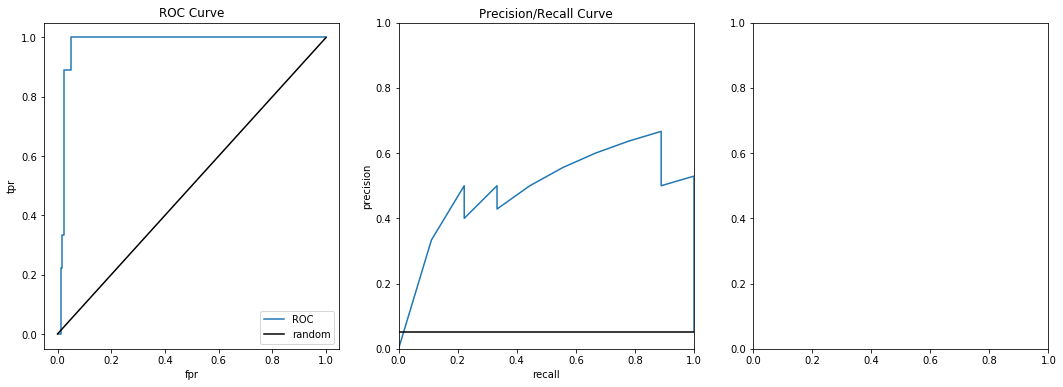

In [232]:
fig, (ax0, ax1, ax3) = plt.subplots(1,3, figsize=(18,6))
df = calculate_threshold_values(model.predict_proba(X_test)[:,1], y_test)
plot_roc(ax0, df)
plot_precision_recall(ax1, df)

In [221]:
y_test, probs

(1984-12    0
 1958-03    1
 1994-01    0
 1981-07    0
 1967-01    0
 1996-06    0
 2001-02    0
 2015-03    0
 1961-11    0
 1982-02    1
 1969-08    0
 1962-04    0
 1997-02    0
 2007-01    0
 2010-06    0
 1970-06    0
 1994-10    0
 2012-12    0
 1997-05    0
 1993-04    0
 2007-03    0
 1969-05    0
 1954-12    0
 2003-04    0
 1958-01    1
 1989-09    0
 1974-04    0
 2001-01    0
 2001-10    0
 1959-07    0
           ..
 1952-05    0
 2007-10    0
 2017-05    0
 1958-10    0
 2002-02    0
 2012-06    0
 1970-05    0
 1990-07    0
 1955-09    0
 1995-06    0
 1970-07    0
 2013-06    0
 1977-05    0
 1980-07    0
 1956-06    0
 2001-07    1
 1957-02    0
 1952-06    0
 1970-09    0
 1997-08    0
 1979-11    0
 1967-06    0
 2008-11    1
 1995-01    0
 1974-08    0
 1950-05    0
 1961-06    0
 2013-03    0
 1968-06    0
 1981-12    0
 Name: Recession, Length: 172, dtype: int64,
 array([[9.90191194e-01, 9.80880646e-03],
        [7.25267844e-01, 2.74732156e-01],
        [9.965412

In [233]:
results = pd.DataFrame(probs)

In [234]:
y_test[1]

0

In [235]:
results['actual'] = y_test.values

In [236]:
results.index = y_test.index

In [237]:
results

0         1  actual
1974-02  0.992890  0.007110       0
1974-06  0.992781  0.007219       0
1992-01  0.970510  0.029490       0
1989-08  0.986150  0.013850       0
2005-03  0.974673  0.025327       0
1955-09  0.898867  0.101133       0
1961-05  0.920424  0.079576       0
1978-11  0.997984  0.002016       0
1964-09  0.982164  0.017836       0
1968-06  0.989436  0.010564       0
2015-11  0.951739  0.048261       0
1999-03  0.989706  0.010294       0
1947-10  0.498474  0.501526       0
1992-09  0.970579  0.029421       0
2007-11  0.935539  0.064461       0
1958-10  0.864173  0.135827       0
1989-02  0.991923  0.008077       0
1995-01  0.989105  0.010895       0
2006-10  0.984739  0.015261       0
1986-08  0.981630  0.018370       0
2005-07  0.979404  0.020596       0
2001-10  0.932545  0.067455       0
1961-11  0.940639  0.059361       0
2016-06  0.959623  0.040377       0
1950-06  0.957808  0.042192       0
1958-01  0.661423  0.338577       1
1952-12  0.912500  0.087500       0
2010-10  0.924680  0.075320       0
1995-12  0.992881  0.007119       0
2011-11  0.905171  0.094829       0
...           ...       ...     ...
1973-02  0.998199  0.001801       0
2000-03  0.978367  0.021633       0
2009-09  0.903301  0.096699       0
2003-06  0.949503  0.050497       0
2004-10  0.967492  0.032508       0
2004-03  0.977066  0.022934       0
1988-04  0.985622  0.014378       0
1968-07  0.991341  0.008659       0
1963-08  0.950974  0.049026       0
1960-07  0.937108  0.062892       0
1976-08  0.986709  0.013291       0
2008-12  0.546167  0.453833       1
1959-12  0.942944  0.057056       0
1948-08  0.856175  0.143825       0
1985-12  0.971503  0.028497       0
2010-12  0.928808  0.071192       0
1962-09  0.962459  0.037541       0
1961-03  0.945262  0.054738       0
1999-11  0.986712  0.013288       0
1993-07  0.975771  0.024229       0
1966-05  0.942878  0.057122       0
1971-07  0.996550  0.003450       0
1971-02  0.987448  0.012552       0
1957-09  0.810241  0.189759       0
1999-07  0.985536  0.014464       0
1951-05  0.891349  0.108651       0
1988-02  0.978475  0.021525       0
1980-12  0.988773  0.011227       0
2008-11  0.601349  0.398651       1
2003-01  0.950288  0.049712       0

[172 rows x 3 columns]

In [242]:
recent_X = X.iloc[-250:]
recent_y = y.iloc[-250:]

In [243]:
probs_recent = model.predict_proba(recent_X)

In [245]:
results = pd.DataFrame(probs_recent)
results['actual'] = recent_y.values
results.index = recent_y.index

In [248]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(results)

                0         1  actual
1998-06  0.990356  0.009644       0
1998-07  0.991270  0.008730       0
1998-08  0.989246  0.010754       0
1998-09  0.990020  0.009980       0
1998-10  0.991819  0.008181       0
1998-11  0.991141  0.008859       0
1998-12  0.992931  0.007069       0
1999-01  0.992321  0.007679       0
1999-02  0.988948  0.011052       0
1999-03  0.989706  0.010294       0
1999-04  0.987186  0.012814       0
1999-05  0.988227  0.011773       0
1999-06  0.985842  0.014158       0
1999-07  0.985536  0.014464       0
1999-08  0.986845  0.013155       0
1999-09  0.986106  0.013894       0
1999-10  0.986945  0.013055       0
1999-11  0.986712  0.013288       0
1999-12  0.986196  0.013804       0
2000-01  0.984301  0.015699       0
2000-02  0.980951  0.019049       0
2000-03  0.978367  0.021633       0
2000-04  0.982331  0.017669       0
2000-05  0.974646  0.025354       0
2000-06  0.973417  0.026583       0
2000-07  0.972684  0.027316       0
2000-08  0.977579  0.022421 

In [249]:
quandl.get('SGE/NGABCONF')

Value
Date             
2008-06-30  10.16
2008-09-30  15.00
2008-12-31   3.80
2009-03-31  -1.20
2009-06-30  -8.60
2009-09-30  -6.40
2009-12-31  -1.87
2010-03-31  10.00
2010-06-30  12.30
2010-09-30  18.38
2010-12-31  30.10
2011-03-31  38.60
2011-06-30  41.10
2011-09-30  23.90
2011-12-31  23.60
2012-03-31  10.10
2012-06-30  16.20
2012-09-30  14.10
2012-12-31  10.90
2013-03-31  25.10
2013-06-30  15.10
2013-09-30  19.00
2013-12-31  16.00
2014-03-31  21.80
2014-06-30  21.70
2014-09-30  16.40
2014-12-31  16.00
2015-03-31   8.40
2015-06-30   2.80
2015-09-30  14.90
2015-12-31   8.30
2016-03-31 -10.30
2016-06-30 -12.30
2016-09-30 -24.10
2016-12-31 -29.00
2017-03-31 -27.70
2017-06-30  -1.50
2017-09-30  -2.60
2017-12-31  17.70
2018-02-28  14.50
2018-03-31  24.50
2018-04-30  28.90
2018-05-31  28.90
2018-06-30  34.70
2018-07-31  13.60
2018-08-31  21.50
2018-09-30  24.80
2018-10-31  23.20
2018-11-30  24.00
2018-12-31  30.50
2019-01-31  25.90
2019-02-28  22.10
2019-11-30  24.00
2019-12-31  30.50